<a href="https://colab.research.google.com/github/stefanny84/CP1---SERS/blob/main/CP1_SERS_parte1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Alunas:***

Letícia Gabrielle Andrade Temoteo, **563985**

Stefanny Brum dos Santos, **566216**

Parte 1: – Exercícios iniciais com Individual Household Electric Power Consumption


In [ ]:
#1. Carregue o dataset e exiba as 10 primeiras linhas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [ ]:
''' 2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

Global_active_power (kW) = o que você realmente consome e paga.
Global_reactive_power (kVAR) = o "custo oculto" do magnetismo/capacitância no sistema, que não faz trabalho
mas pode prejudicar a eficiência. '''

' 2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.\n\nGlobal_active_power (kW) = o que você realmente consome e paga.\nGlobal_reactive_power (kVAR) = o "custo oculto" do magnetismo/capacitância no sistema, que não faz trabalho\nmas pode prejudicar a eficiência. '

In [ ]:
# 3. Verifique se existem valores ausentes no dataset. Quantifique-os.
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [ ]:
#4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.

df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
df['DayOfWeek'] = df['Date'].dt.day_name()

display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


In [ ]:
#5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.

df_2007 = df[df['Date'].dt.year == 2007].copy()
df_2007['Global_active_power'] = pd.to_numeric(df_2007['Global_active_power'], errors='coerce')
df_2007.dropna(subset=['Global_active_power'], inplace=True)

daily_mean_power_2007 = df_2007.groupby('Date')['Global_active_power'].mean()

overall_daily_mean_power_2007 = daily_mean_power_2007.mean()

print(f'A média de consumo diário de Global_active_power em 2007 é: {overall_daily_mean_power_2007:.2f}')

A média de consumo diário de Global_active_power em 2007 é: 1.12


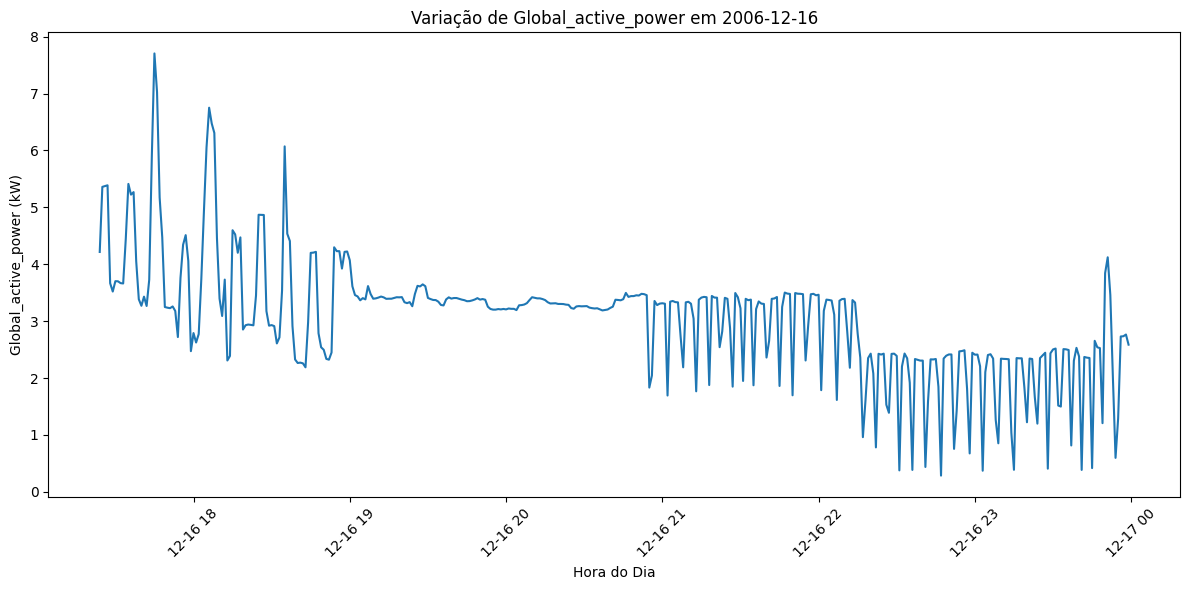

In [ ]:
#6.Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.

plot_date = '2006-12-16'

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

df_single_day = df[df['Date'].dt.strftime('%Y-%m-%d') == plot_date].copy()

df_single_day['Global_active_power'] = pd.to_numeric(df_single_day['Global_active_power'], errors='coerce')
df_single_day.dropna(subset=['Global_active_power'], inplace=True)

df_single_day['DateTime'] = pd.to_datetime(df_single_day['Date'].dt.strftime('%Y-%m-%d') + ' ' + df_single_day['Time'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.lineplot(x='DateTime', y='Global_active_power', data=df_single_day)
plt.title(f'Variação de Global_active_power em {plot_date}')
plt.xlabel('Hora do Dia')
plt.ylabel('Global_active_power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

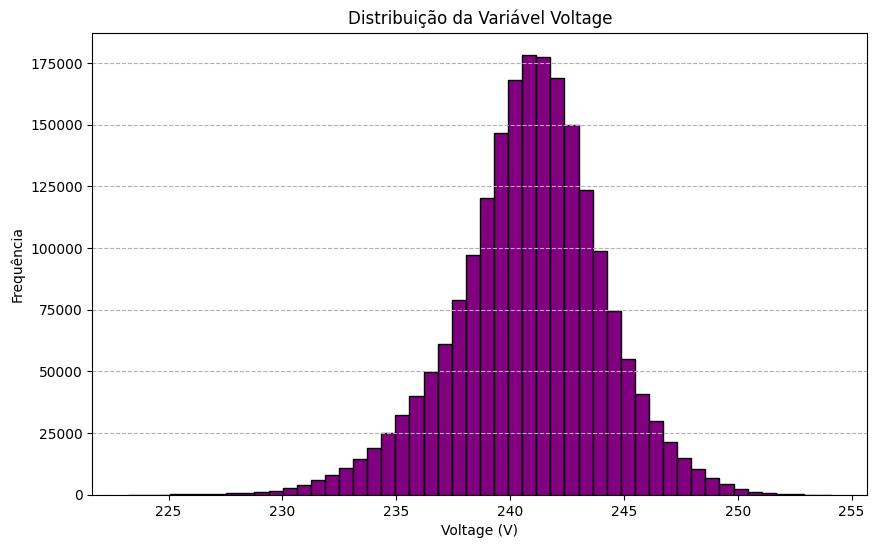

In [ ]:
#7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

df.dropna(subset=['Voltage'], inplace=True)

plt.figure(figsize=(10, 6))
plt.hist(df['Voltage'], bins=50, edgecolor='black', color='purple')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequência')
plt.title('Distribuição da Variável Voltage')
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
#8. Calcule o consumo médio por mês em todo o período disponível no dataset.

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df.dropna(subset=['Global_active_power'], inplace=True)
df['Meses'] = df['Date'].dt.to_period('M')
monthly_mean_power = df.groupby('Meses')['Global_active_power'].mean()

print("Consumo médio por mês:\n")
print(monthly_mean_power)

Consumo médio por mês:

Meses
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
2007-05    0.985862
2007-06    0.826814
2007-07    0.667367
2007-08    0.764186
2007-09    0.969318
2007-10    1.103911
2007-11    1.294473
2007-12    1.626474
2008-01    1.459920
2008-02    1.181384
2008-03    1.245337
2008-04    1.115972
2008-05    1.024281
2008-06    0.994096
2008-07    0.794781
2008-08    0.276488
2008-09    0.987680
2008-10    1.136768
2008-11    1.387066
2008-12    1.275189
2009-01    1.410202
2009-02    1.247568
2009-03    1.226735
2009-04    1.140690
2009-05    1.012856
2009-06    0.840756
2009-07    0.618121
2009-08    0.664619
2009-09    0.986841
2009-10    1.144486
2009-11    1.274743
2009-12    1.364421
2010-01    1.430525
2010-02    1.375855
2010-03    1.130075
2010-04    1.027295
2010-05    1.095284
2010-06    0.969615
2010-07    0.721068
2010-08    0.590778
2010-09    0.956442
2010-10    1.163399
2010-11    1.196854
Freq: M, N

In [ ]:
# 9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

daily_power_consumption = df.groupby('Date')['Global_active_power'].sum()

day_max_consumption = daily_power_consumption.idxmax()
max_consumption_value = daily_power_consumption.max()

print(f"O dia com maior consumo de energia ativa global foi {day_max_consumption.strftime('%d-%m-%Y')} com um consumo total de {max_consumption_value:.2f} kW.")

O dia com maior consumo de energia ativa global foi 23-12-2006 com um consumo total de 4773.39 kW.


In [ ]:
#10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.

df['Dias'] = df['Date'].dt.day_name()
semana_mean_power = df.groupby('Dias')['Global_active_power'].mean()

print("Consumo médio de energia ativa global por dia da semana:\n")
print(semana_mean_power)

Consumo médio de energia ativa global por dia da semana:

Dias
Friday       1.043394
Monday       0.999546
Saturday     1.248335
Sunday       1.220188
Thursday     0.981809
Tuesday      1.069796
Wednesday    1.082588
Name: Global_active_power, dtype: float64


In [ ]:
#11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

correlacao_power_reactive = df['Global_active_power'].corr(df['Global_reactive_power'])
correlacao_power_voltage = df['Global_active_power'].corr

print(correlacao_power_reactive)
print(correlacao_power_voltage)

0.24701705264406404
<bound method Series.corr of 0          4.216
1          5.360
2          5.374
3          5.388
4          3.666
           ...  
2075254    0.946
2075255    0.944
2075256    0.938
2075257    0.934
2075258    0.932
Name: Global_active_power, Length: 2049280, dtype: float64>


In [ ]:
#12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3

df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce').fillna(0)
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce').fillna(0)
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce').fillna(0)


df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

print(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']])

         Sub_metering_1  Sub_metering_2  Sub_metering_3  Total_Sub_metering
0                   0.0             1.0            17.0                18.0
1                   0.0             1.0            16.0                17.0
2                   0.0             2.0            17.0                19.0
3                   0.0             1.0            17.0                18.0
4                   0.0             1.0            17.0                18.0
...                 ...             ...             ...                 ...
2075254             0.0             0.0             0.0                 0.0
2075255             0.0             0.0             0.0                 0.0
2075256             0.0             0.0             0.0                 0.0
2075257             0.0             0.0             0.0                 0.0
2075258             0.0             0.0             0.0                 0.0

[2049280 rows x 4 columns]


In [ ]:
#13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

mean_power = df.groupby('Meses')['Global_active_power'].mean()
mean_submetering = df.groupby('Meses')['Total_Sub_metering'].mean()

print(mean_power)
print(mean_submetering)

Meses
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
2007-05    0.985862
2007-06    0.826814
2007-07    0.667367
2007-08    0.764186
2007-09    0.969318
2007-10    1.103911
2007-11    1.294473
2007-12    1.626474
2008-01    1.459920
2008-02    1.181384
2008-03    1.245337
2008-04    1.115972
2008-05    1.024281
2008-06    0.994096
2008-07    0.794781
2008-08    0.276488
2008-09    0.987680
2008-10    1.136768
2008-11    1.387066
2008-12    1.275189
2009-01    1.410202
2009-02    1.247568
2009-03    1.226735
2009-04    1.140690
2009-05    1.012856
2009-06    0.840756
2009-07    0.618121
2009-08    0.664619
2009-09    0.986841
2009-10    1.144486
2009-11    1.274743
2009-12    1.364421
2010-01    1.430525
2010-02    1.375855
2010-03    1.130075
2010-04    1.027295
2010-05    1.095284
2010-06    0.969615
2010-07    0.721068
2010-08    0.590778
2010-09    0.956442
2010-10    1.163399
2010-11    1.196854
Freq: M, Name: Global_active_power

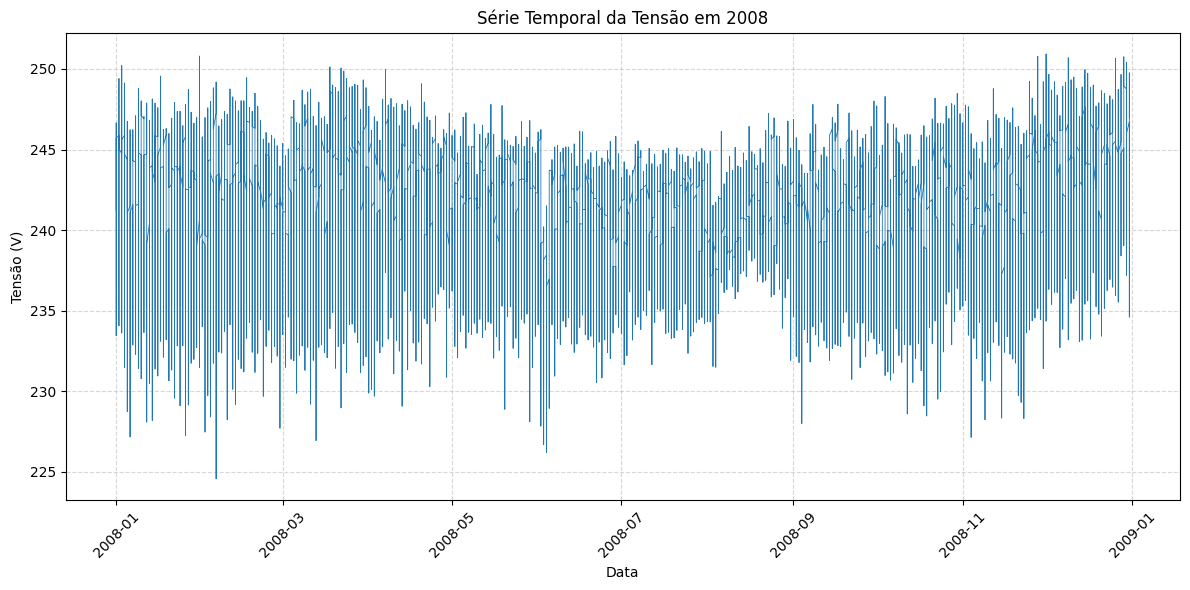

In [ ]:
#14. Faça um gráfico de série temporal do Voltage para o ano de 2008

df_2008 = df[df['Date'].dt.year == 2008].copy()
df_2008 = df_2008.dropna(subset=['Voltage'])

plt.figure(figsize=(12, 6))
plt.plot(df_2008['Date'], df_2008['Voltage'], linewidth=0.6)
plt.xlabel('Data')
plt.ylabel('Tensão (V)')
plt.title('Série Temporal da Tensão em 2008')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

meses_verao_list = [6, 7, 8]
meses_inverno_list = [12, 1, 2]

# Extrai o mês
df['Month'] = df['Date'].dt.month

# Filtra verão e inverno
df_verao = df[df['Month'].isin(meses_verao_list)].copy()
df_inverno = df[df['Month'].isin(meses_inverno_list)].copy()

# Calcula consumo médio
average_verao_consumption = df_verao['Global_active_power'].mean()
average_inverno_consumption = df_inverno['Global_active_power'].mean()

print(f"Consumo médio de energia ativa global no verão: {average_verao_consumption:.2f} kW")
print(f"Consumo médio de energia ativa global no inverno: {average_inverno_consumption:.2f} kW")


Consumo médio de energia ativa global no verão: 0.73 kW
Consumo médio de energia ativa global no inverno: 1.42 kW


Distribuição da base completa:
count    2.049280e+06
mean     1.091615e+00
std      1.057294e+00
min      7.600000e-02
25%      3.080000e-01
50%      6.020000e-01
75%      1.528000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64

Distribuição da amostra de 1%:
count    20493.000000
mean         1.100869
std          1.059972
min          0.078000
25%          0.312000
50%          0.634000
75%          1.536000
max          8.540000
Name: Global_active_power, dtype: float64


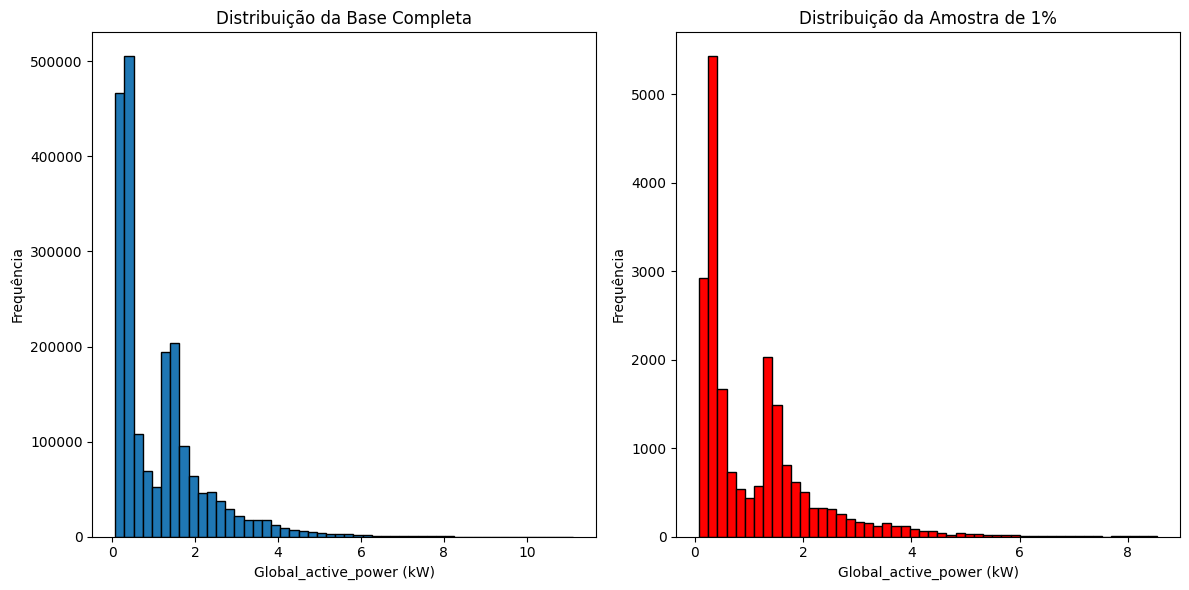

In [ ]:
#16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.

df_sample = df.sample(frac=0.01, random_state=42)

print("Distribuição da base completa:")
print(df['Global_active_power'].describe())

print("\nDistribuição da amostra de 1%:")
print(df_sample['Global_active_power'].describe())

# Colocamos as comparações em dois histogramas para facilitar a visualização
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Global_active_power'].dropna(), bins=50, edgecolor='black')
plt.title('Distribuição da Base Completa')
plt.xlabel('Global_active_power (kW)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(df_sample['Global_active_power'].dropna(), bins=50, edgecolor='black', color='red')
plt.title('Distribuição da Amostra de 1%')
plt.xlabel('Global_active_power (kW)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [ ]:
#17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['Global_active_power'] = scaler.fit_transform(df[['Global_active_power']])

print(df['Global_active_power'])

0          0.374796
1          0.478363
2          0.479631
3          0.480898
4          0.325005
             ...   
2075254    0.078762
2075255    0.078580
2075256    0.078037
2075257    0.077675
2075258    0.077494
Name: Global_active_power, Length: 2049280, dtype: float64


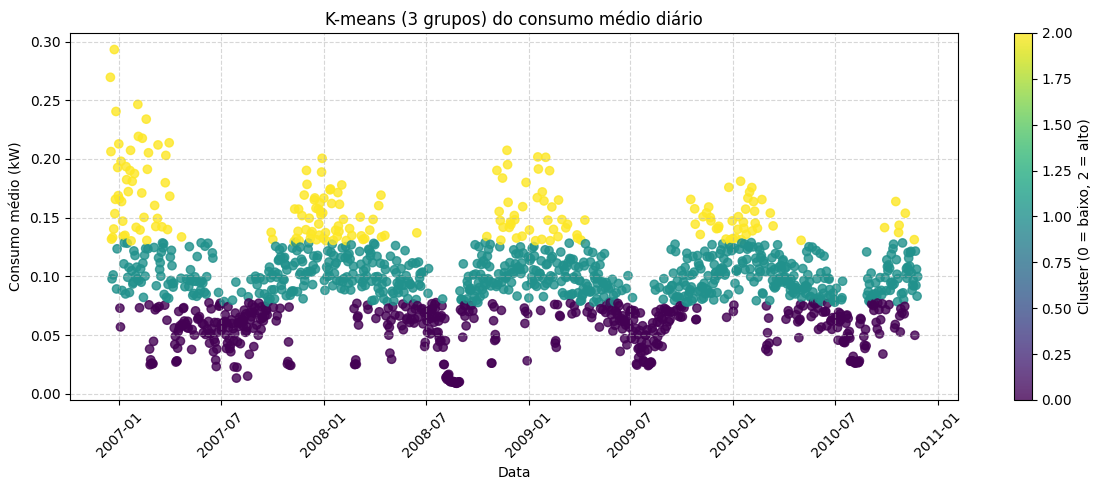

/tmp/ipython-input-2178129237.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dados_box, labels=['Cluster 0', 'Cluster 1', 'Cluster 2'], showfliers=False)


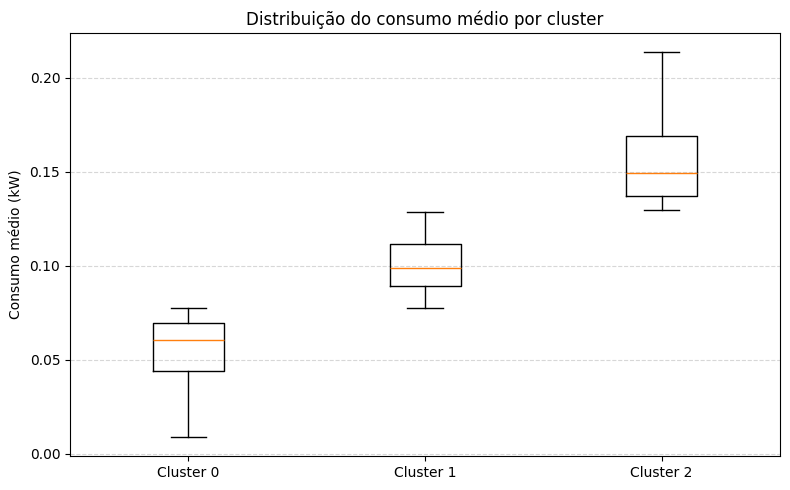


Interpretação:
- Cluster 0: dias de BAIXO consumo médio (centro ~ 0.05 kW) — provável rotina mais leve.
- Cluster 1: dias de CONSUMO INTERMEDIÁRIO (centro ~ 0.10 kW) — padrão típico do dia a dia.
- Cluster 2: dias de ALTO consumo médio (centro ~ 0.16 kW) — eventos/picos (ex.: mais eletrodomésticos, clima extremo, visitas).


In [ ]:
#18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados

from sklearn.cluster import KMeans

df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

daily = df.groupby('Date')['Global_active_power'].mean().reset_index()
daily.columns = ['Dia', 'Consumo_medio_kW']


kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
daily['Cluster'] = kmeans.fit_predict(daily[['Consumo_medio_kW']])

centros = kmeans.cluster_centers_.flatten()
ordem = np.argsort(centros)


mapa = {old_label: new_label for new_label, old_label in enumerate(ordem)}

daily['Cluster'] = daily['Cluster'].map(mapa)
centros_ordenados = np.sort(centros)


plt.figure(figsize=(12, 5))
plt.scatter(pd.to_datetime(daily['Dia']), daily['Consumo_medio_kW'],
            c=daily['Cluster'], cmap='viridis', alpha=0.8)
plt.colorbar(label='Cluster (0 = baixo, 2 = alto)')
plt.title('K-means (3 grupos) do consumo médio diário')
plt.xlabel('Data')
plt.ylabel('Consumo médio (kW)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))


dados_box = [daily.loc[daily['Cluster']==i, 'Consumo_medio_kW'] for i in range(3)]
plt.boxplot(dados_box, labels=['Cluster 0', 'Cluster 1', 'Cluster 2'], showfliers=False)
plt.title('Distribuição do consumo médio por cluster')
plt.ylabel('Consumo médio (kW)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Interpretação
print("\nInterpretação:")
print("- Cluster 0: dias de BAIXO consumo médio (centro ~ {:.2f} kW) — "
      "provável rotina mais leve.".format(centros_ordenados[0]))
print("- Cluster 1: dias de CONSUMO INTERMEDIÁRIO (centro ~ {:.2f} kW) — "
      "padrão típico do dia a dia.".format(centros_ordenados[1]))
print("- Cluster 2: dias de ALTO consumo médio (centro ~ {:.2f} kW) — "
      "eventos/picos (ex.: mais eletrodomésticos, clima extremo, visitas).".format(centros_ordenados[2]))

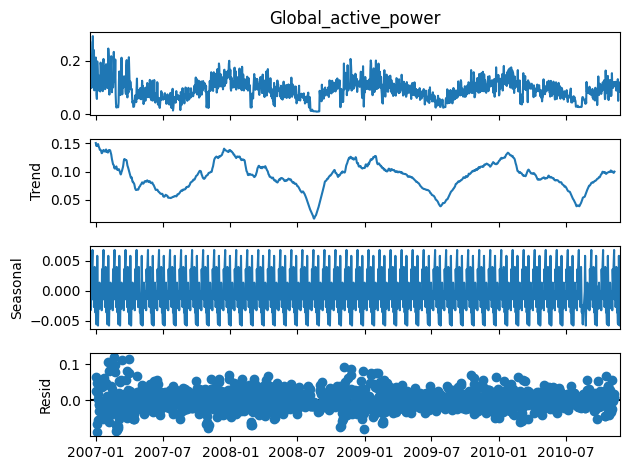

In [ ]:
#19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

from statsmodels.tsa.seasonal import seasonal_decompose

df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], errors='coerce')

df.set_index('DateTime', inplace=True)

df_resampled = df['Global_active_power'].resample('D').mean().dropna()

decomposition = seasonal_decompose(df_resampled, model='additive', period=30)

fig = decomposition.plot()
plt.show()

In [ ]:
#20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

try:
    df = pd.read_csv('/content/household_power_consumption.txt', sep=';', na_values=['?'])
    df_model = df[['Global_intensity', 'Global_active_power']].dropna()
except FileNotFoundError:
    print("Erro: Arquivo 'household_power_consumption.txt' não encontrado.")
    print("Por favor, execute o código anterior completo para baixar o arquivo ou coloque-o manualmente na pasta.")
    exit()

X = df_model[['Global_intensity']]
y = df_model['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("--- Avaliação do Erro do Modelo ---")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f} (ou {r2:.2%})")

--- Avaliação do Erro do Modelo ---
RMSE: 0.0496
R²:   0.9978 (ou 99.78%)


Parte 2: Exercícios adicionais no dataset inicial

In [ ]:
# 21. Séries temporais por hora
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), dayfirst=True)
df.set_index('datetime', inplace=True)
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'])
df_hourly = df['Global_active_power'].resample('h').mean()
consumo_medio_por_hora = df_hourly.groupby(df_hourly.index.hour).mean()
consumo_medio_por_hora = consumo_medio_por_hora.sort_values(ascending=False)

print("Consumo médio de energia por hora do dia (maior consumo):")
print(consumo_medio_por_hora)

Consumo médio de energia por hora do dia (maior consumo):
datetime
20    1.899073
21    1.876063
19    1.733428
7     1.502373
8     1.460940
22    1.412681
9     1.331642
18    1.326433
10    1.260913
11    1.246408
12    1.207061
13    1.144471
14    1.082750
17    1.056164
15    0.990806
16    0.948805
23    0.902142
6     0.791606
0     0.659562
1     0.539325
2     0.480618
5     0.453674
3     0.444850
4     0.443844
Name: Global_active_power, dtype: float64


In [ ]:
# 22. Autocorrelação do consumo
consumo_horario = df['Global_active_power']
autocorr_lag1 = consumo_horario.autocorr(lag=1)
autocorr_lag24 = consumo_horario.autocorr(lag=24)
autocorr_lag48 = consumo_horario.autocorr(lag=48)

print("--- Análise de Autocorrelação do Consumo de Energia ---")
print(f"Autocorrelação (Lag 1 hora):  {autocorr_lag1:.4f}")
print(f"Autocorrelação (Lag 24 horas): {autocorr_lag24:.4f}")
print(f"Autocorrelação (Lag 48 horas): {autocorr_lag48:.4f}")

print("Se o valor da autocorrelação é muito próximo de 1, significa que existem padrões e repetições muito fortes.")

--- Análise de Autocorrelação do Consumo de Energia ---
Autocorrelação (Lag 1 hora):  0.9680
Autocorrelação (Lag 24 horas): 0.6650
Autocorrelação (Lag 48 horas): 0.5395
Se o valor da autocorrelação é muito próximo de 1, significa que existem padrões e repetições muito fortes.


In [ ]:
# 23. Redução de dimensionalidade com PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import requests
import zipfile
import io

features = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity'
]


df_subset = df[features].apply(pd.to_numeric, errors='coerce').dropna().copy()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_subset)

pca = PCA(n_components=2)
pca.fit(data_scaled)

explained_variance = pca.explained_variance_ratio_

print("\n--- Análise da Variância Explicada ---")
print(f"Componente Principal 1 (PC1) explica: {explained_variance[0]:.2%}")
print(f"Componente Principal 2 (PC2) explica: {explained_variance[1]:.2%}")
print("-------------------------------------------------")
print(f"Variância Total explicada pelos 2 componentes: {np.sum(explained_variance):.2%}")


--- Análise da Variância Explicada ---
Componente Principal 1 (PC1) explica: 59.10%
Componente Principal 2 (PC2) explica: 22.72%
-------------------------------------------------
Variância Total explicada pelos 2 componentes: 81.82%


/tmp/ipython-input-2009991596.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('pca_kmeans_clusters.png')


Os grupos se separam de forma clara.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


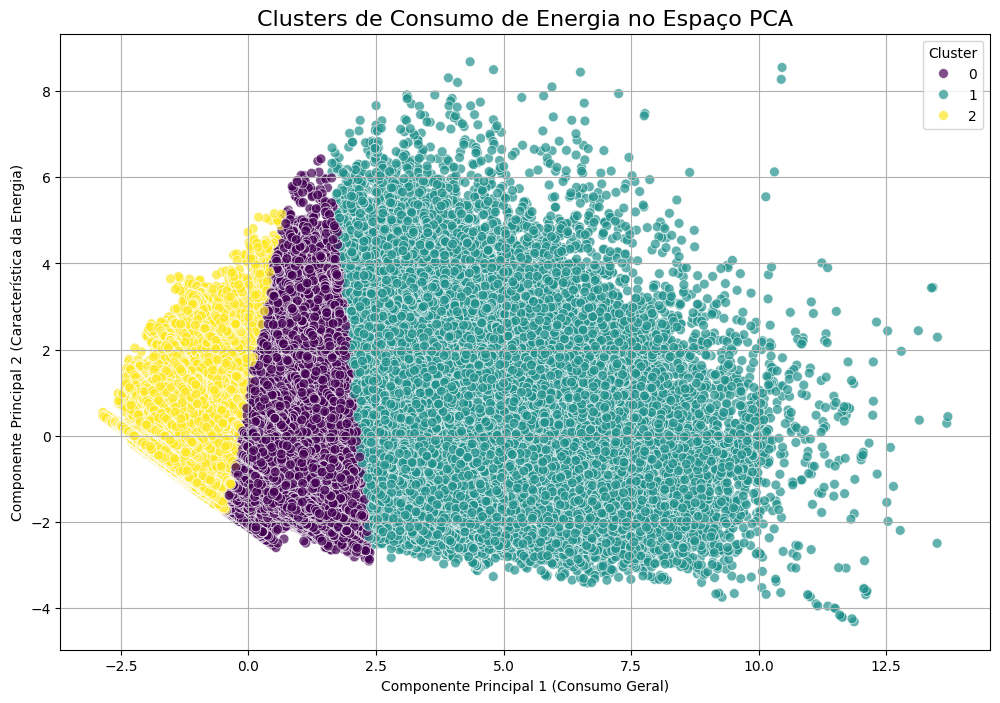

In [ ]:
# 24. Visualização de clusters no espaço PCA
from sklearn.cluster import KMeans

features = [
        'Global_active_power', 'Global_reactive_power',
        'Voltage', 'Global_intensity'
    ]
df_subset = df[features].copy()
df_subset.dropna(inplace=True)

principal_components = pca.fit_transform(data_scaled)

df_pca_result = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


kmeans = KMeans(
    n_clusters=3,
    n_init=10,
    random_state=42
)

clusters = kmeans.fit_predict(df_pca_result)

df_pca_result['cluster'] = clusters

plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cluster',
    data=df_pca_result,
    palette='viridis',
    alpha=0.7,
    s=50
)

plt.title('Clusters de Consumo de Energia no Espaço PCA', fontsize=16)
plt.xlabel('Componente Principal 1 (Consumo Geral)')
plt.ylabel('Componente Principal 2 (Característica da Energia)')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig('pca_kmeans_clusters.png')
print("Os grupos se separam de forma clara.")


--- Comparação dos Modelos ---
RMSE da Regressão Linear Simples: 0.9829
RMSE da Regressão Polinomial (Grau 2): 0.9785


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


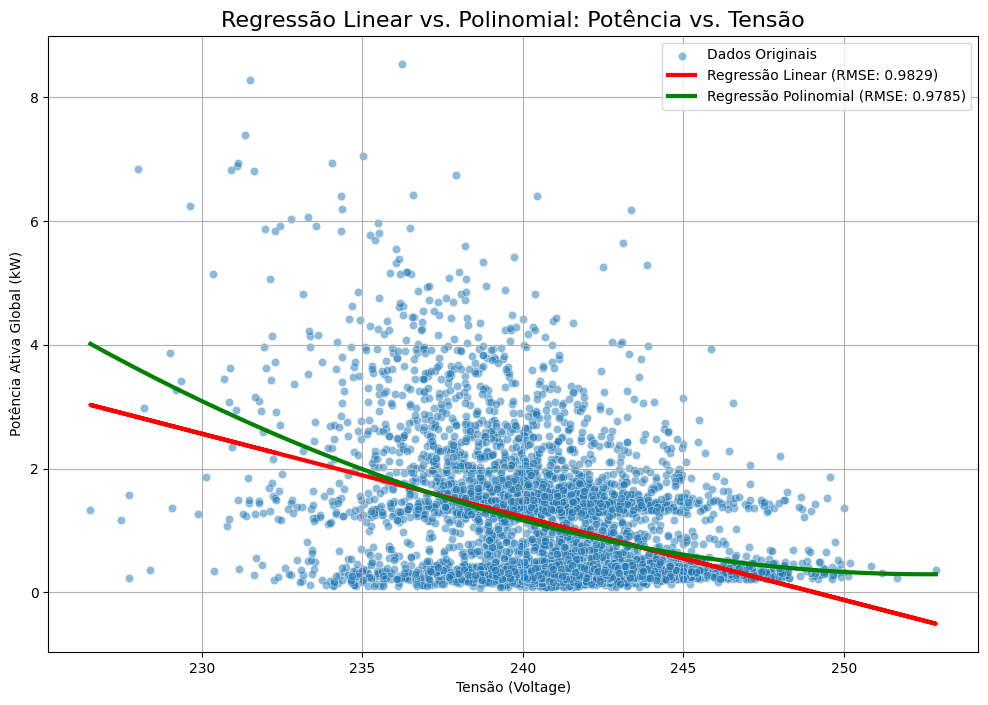

In [ ]:
# 25. Regressão polinomial vs linear
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_reg = df[['Voltage', 'Global_active_power']].dropna()

df_sample = df_reg.sample(n=5000, random_state=42)

X = df_sample[['Voltage']]
y = df_sample['Global_active_power']

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)
rmse_lin = np.sqrt(mean_squared_error(y, y_pred_lin))

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))

print("\n--- Comparação dos Modelos ---")
print(f"RMSE da Regressão Linear Simples: {rmse_lin:.4f}")
print(f"RMSE da Regressão Polinomial (Grau 2): {rmse_poly:.4f}")

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot_poly = poly_reg.predict(X_plot_poly)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Voltage', y='Global_active_power', data=df_sample, alpha=0.5, label='Dados Originais')
plt.plot(X, y_pred_lin, color='red', linewidth=3, label=f'Regressão Linear (RMSE: {rmse_lin:.4f})')
plt.plot(X_plot, y_plot_poly, color='green', linewidth=3, label=f'Regressão Polinomial (RMSE: {rmse_poly:.4f})')

plt.title('Regressão Linear vs. Polinomial: Potência vs. Tensão', fontsize=16)
plt.xlabel('Tensão (Voltage)')
plt.ylabel('Potência Ativa Global (kW)')
plt.legend()
plt.grid(True)
plt.savefig('regressao_comparacao.png')